## This notebook demos Python data visualizations on the Iris dataset

This is my fork of Ben Hammer's well-regarded Iris dataset Python notebook and is my first Kernel on Kaggle. This fork is a learning experience for me since I'm new to data science!

I'm using three go-to Python libraries for this tutorial which are described in more detail in the code below: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/)

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# Next, we import matplotlib, which is a go-to Python plotting library
import matplotlib.pyplot as plt

# Lastly, we'll import seaborn. Seaborn is is a powerful Python graphing
# library based on matplotlib that attempts to optimize matplotlib's output
import seaborn as sns
# Here, we switch from matplotlib's default graph style to seaborn's default graph style.
# I chose to use seaborn's default set which displays graph lines inside the graph's 
# space; this is in contrast to matplotlib which doesn't display graph lines
sns.set(color_codes=True)
# The current version of seaborn generates a bunch of warnings that we'll ignore with
#these two lines
import warnings
warnings.filterwarnings("ignore")


# Now we'll load the Iris flower dataset. To find the dataset's actual location, when
# editing a Kaggle notebook, click on the arrow on the top right of the page and then 
# on the dataset. The location name appears beneath the dataset name.
iris = pd.read_csv("Iris.csv") # the Iris dataset is now a pandas DataFrame

# Let's see what's in the Iris data with this line:
iris.head()

# Press Ctrl+Enter to execute this cell. As you work through this notebook, do the 
# same with all subsequent cells in turn

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


So, you can see we have 6 columns; the first is just the plant ID, the next 4 are independent variables, and the last column is effectively the dependent variable.

In [2]:
# Let's see how many examples we have of each species as well as the data type for 
# each species
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

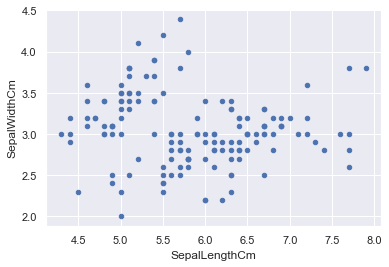

In [3]:
# The first way we can plot things is using the .plot extension from pandas DataFrames
# via matplotlib (no seaborn yet!)
#
# We'll use this to make a scatterplot of two of the four Iris features as follows
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

In the graph above, you can see there seems to be a split between portions of the data (data points with large sepal width but lower sepal length seem to be clustered together, for example). Also, there look to be a few potential outliers toward the top right.

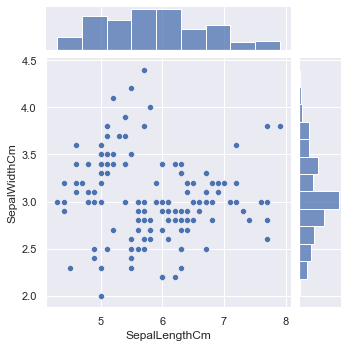

In [4]:
# We can also use the seaborn library to make a similar plot
#
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the 
# same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

The additional detail provided by the histograms shows us there are many data points with a sepal width of 3 spread across the sepal length axis.

In [14]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species. That's what 
# hue="Species" is for in the 1st line below!
#
# I've also added a parameter to the FacetGrid function for color palette. Here it's 
# set to husl.
sns.FacetGrid(iris, hue="Species", palette="husl", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

In [16]:
# Below are iterations of the above chart created with different seaborn color palettes.
# Take a look at the seaborn website, linked at the very top above, for more color palette
# examples and ways you can customize your own palette
# Here's a more typical palette
sns.FacetGrid(iris, hue="Species", palette="hls", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Here's a palette that, per my understanding, is more "color blind safe", aka more visible
# for people with colorblindness
# This set comes from Color Brewer, which helps you create color sets that are color blind
# safe, among other palettes!
sns.FacetGrid(iris, hue="Species", palette="Set2", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Here's another one
sns.FacetGrid(iris, hue="Species", palette="cubehelix", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()


Let's stick with the "husl" color palette through the rest of this notebook!

In [18]:
# We can look at an individual feature in Seaborn through mnay different kinds of plots. 
# Here's a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=iris)

From the boxplot above alone, we can see that each Iris species is clearly separable based upon petal length, with just a bit of potential overlap in the Iris-versicolor and Iris virgnica. This theme will reappear in almost all of the other charts we create. We can see with the naked eye, just by visualization, at least one way to differentiate all three species!

In [19]:
# Here's a violinplot -- this shows the density of data at each primary split, where 
# denser sections are fatter than more sparse sections
sns.violinplot(x="Species", y="PetalLengthCm", palette="husl", data=iris)

In [26]:
# And here's a violinplot with data points shown inside
# First, you plot the violinplot like so
sns.violinplot(x="Species", y="PetalLengthCm", palette="husl", data=iris)
# Then, you can place a swarmplot on top of the violinplot. We are also re-coloring
# the data points white to make them stand out more.
# The alpha parameter lets you mess with the transparency of the individual data points.
# A higher alpha equates to less transparency
sns.swarmplot(x="Species", y="PetalLengthCm", data=iris, color="w", alpha=.9);

In [28]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
# The higher a line goes on the y-axis, the denser the data is at that x-axis number
sns.FacetGrid(iris, hue="Species", palette="husl", size=6).map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [30]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
#
# Note that we want to drop the ID variable because it has no correlation with any other
# variable. The ID number assigned to a particular observation has no bearing on the analysis
# and would only mess up the plots
sns.pairplot(iris.drop("Id", axis=1), hue="Species", palette="husl", size=3)

In [31]:
# The diagonal elements in a pairplot show the histogram by default, as you can see above.
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", palette="husl", size=3, diag_kind="kde")

In [34]:
# Now that we've covered seaborn, let's go back to pandas to see what kinds of plots 
# we can make with the pandas library.
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 10))

In [36]:
# Andrews Curves can also be created using pandas
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting the series
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

In [37]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [39]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

# Wrapping Up

This was my first time really working in Kaggle's notebooks and the first time I've really visualized anything with seaborn. Both it and pandas (matplotlib) are incredibly useful for graphing! I spent a while looking through seaborn's tutorials on its website, and I highly suggest everyone else does as well! I reused quite a bit of code and many explanations from Ben Hammer's original notebook, but added and deleted quite a few lines myself to prepare this! Take care,
